In [1]:
import numpy as np
from empiricaldist import Pmf

In [2]:
hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)

In [3]:
def update_train(pmf, data):
    hypos = pmf.qs
    likelihood = 1 / hypos # 1/N is the likelihood -> assuming seeing any one is equally likely
    impossible = hypos < data #data is the train number we witnessed, therefore anything less must have no likelihood
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [4]:
data = 60
posterior = prior.copy()
update_train(posterior, data)


In [5]:
from utils import decorate

<Axes: >

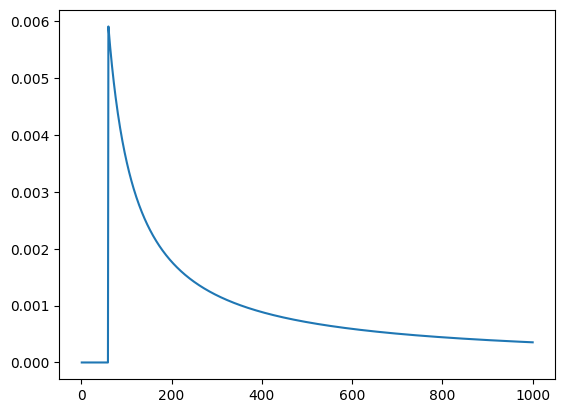

In [6]:
posterior.plot()

In [7]:
posterior.max_prob()

np.int64(60)

In [9]:
posterior[60]

np.float64(0.005905417875729857)

In [10]:
np.sum(posterior.qs * posterior.ps)

np.float64(333.41989326370776)

In [11]:
posterior.mean()

np.float64(333.41989326370776)

5.2. Sensitivity to the Prior

In [12]:
import pandas as pd

In [15]:
df = pd.DataFrame(columns=['Posterior Mean'])
df.index.name = 'Upper Bound'

for high in [500, 1000, 2000]:
    hypos = np.arange(1, high+1)
    pmf = Pmf(1, hypos)
    update_train(pmf, 60)
    mean = pmf.mean()
    df.loc[high] = mean
df

,Posterior Mean
Upper Bound,
500,207.079228
1000,333.419893
2000,552.179017


When the posterior is sensitive to the prior, there are two ways to proceed:

    Get more data.

    Get more background information and choose a better prior.

With more data, posterior distributions based on different priors tend to converge.
For example, suppose that in addition to train 60 we also see trains 30 and 90.

In [16]:
df = pd.DataFrame(columns=['Posterior Mean'])
df.index.name = 'Upper Bound'

dataset = [30, 60, 90]
for high in [500, 1000, 2000]:
    hypos = np.arange(1, high+1)
    pmf = Pmf(1, hypos)
    for data in dataset:
        update_train(pmf, data)
    mean = pmf.mean()
    df.loc[high] = mean
df

,Posterior Mean
Upper Bound,
500,151.849588
1000,164.305586
2000,171.338181


5.3. Power Law Prior

In [ ]:
alpha = 1.0
ps = hypos**(-alpha) #this is where we are changing from uniform prior to something else.
power = Pmf(ps, hypos, name='power law')
power.normalize()

np.float64(8.178368103610282)

In [19]:
hypos = np.arange(1, 1001)
uniform = Pmf(1, hypos, name='uniform')
uniform.normalize()

np.int64(1000)

In [20]:
dataset = 60
update_train(power, dataset)
update_train(uniform, dataset)

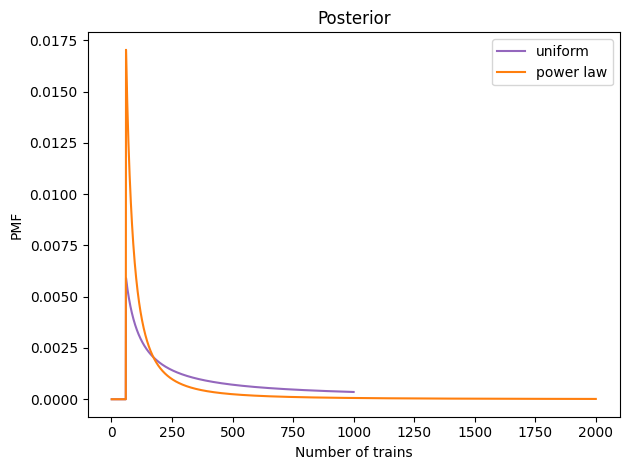

In [22]:
uniform.plot(color='C4')
power.plot(color='C1')

decorate(xlabel='Number of trains',
         ylabel='PMF',
         title='Posterior')

5.4. Credible Intervals

In [23]:
power.prob_le(100)

np.float64(0.42045690954725906)

In [27]:
def quantile(pmf, prob):
    '''Call thi quantile because the returned value is between 0-1, if it was 0-100 it would be percentile'''
    total = 0
    for q, p in pmf.items():
        total += p
        if total > prob:
            return q
    return np.nan

In [28]:
quantile(power, 0.5)

116

In [29]:
power.quantile([0.05, 0.95])

array([ 63., 760.])

In [30]:
power.credible_interval(0.9)

array([ 63., 760.])

5.6. Informative Priors

Also, for most practical problems, you are likely to be in one of two situations: either you have a lot of data or not very much. If you have a lot of data, the choice of the prior doesn’t matter; informative and uninformative priors yield almost the same results. If you don’t have much data, using relevant background information (like the power law distribution) makes a big difference.